In [2]:
# set parameter and csv file path

is_need_preprocessing = False
csv_file_path = '../model/asdf_single_log_long_preprocessing.csv'
file_name =  csv_file_path.split("/")[-1]

save_params = True

In [3]:
# ignore warnings

import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [4]:
import numpy as np
import pandas as pd

In [5]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음

if is_need_preprocessing:

    x_names = ['L%d%c' % (i, c) for i in range(21) for c in ['x', 'y', 'z']] 
    y_names = ['a', 's', 'd', 'f', 'None']

    col_names = x_names + y_names

    df = pd.read_csv(csv_file_path, names=col_names)
    df.head()

In [6]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음

if is_need_preprocessing:
    y_names_origin = ['a', 's', 'd', 'f']

    for row in range(len(df)):
        df['None'].iloc[row] = 1
        for value in df[y_names_origin].iloc[row]:
            if value == 1:
                df['None'].iloc[row] = 0
                break

In [7]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음

if is_need_preprocessing:
    import sys, os
    sys.path.append(os.pardir)

    from visualization.smoother import gamma_smoothing, average_smoothing

    df = gamma_smoothing(df)  # takes about 1 min
    # df = average_smoothing(df)
    df.head()

In [8]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음
# normalization, about 1 min

if is_need_preprocessing:
	from sklearn.preprocessing import MinMaxScaler
	scaler = MinMaxScaler()

	for column in x_names:
		df_column = df[column]
		df_column = df_column.values.reshape(-1, 1)
		df_column = scaler.fit_transform(df_column)

		for row in range(len(df)):
			df[column].iloc[row] = df_column[row]


In [9]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음
# 원본 데이터 전처리 한 것 csv 로 저장

if is_need_preprocessing:

    import pandas as pd
    from pandas import DataFrame

    df.to_csv(csv_file_path.replace(".csv", "_preprocessing.csv"), sep=",", index=False, header=False)

In [10]:
# asdf_single_space_log_preprocessing.csv를 이용해 전처리 과정 스킵하고 바로 불러오기

if not is_need_preprocessing:
    file_path = csv_file_path

    x_names = ['L%d%c' % (i, c) for i in range(21) for c in ['x', 'y', 'z']] 
    y_names = ['a', 's', 'd', 'f', 'None']

    col_names = x_names + y_names

    df = pd.read_csv(csv_file_path, names=col_names)
    df.head()


In [11]:
# x, y split
x, y = df[x_names], df[y_names]

In [12]:
# train, test split
train_test_ratio = 0.90

train_num = int(len(df) * train_test_ratio)

x_train, x_test = x[:train_num], x[train_num:]
y_train, y_test = y[:train_num], y[train_num:]

# train_test_ratio = 0.2

# train_num = int(len(df) * 0.2)

# x_train, x_test = x[train_num:], x[:train_num]
# y_train, y_test = y[train_num:], y[:train_num]

x_train_numpy = x_train.to_numpy()
x_test_numpy = x_test.to_numpy()
y_train_numpy = y_train.to_numpy()
y_test_numpy = y_test.to_numpy()

In [13]:
# apply mlp

import tensorflow as tf
from tensorflow import keras

model = tf.keras.models.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(63,)),
    # keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
  ])

model.compile(optimizer='adam',
                loss=tf.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])


2021-12-01 13:02:59.946697: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/great/catkin_ws/devel/lib:/opt/ros/melodic/lib
2021-12-01 13:02:59.946726: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-12-01 13:03:01.451309: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 13:03:01.451724: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/great/catkin_ws/devel/lib:/opt/ros/melodic/lib
2021-12-01 13:03:01.

In [14]:
model.fit(x_train, y_train, epochs=100)

model.evaluate(x_test, y_test, verbose=2)

Epoch 1/100
127/127 [==============================] - 1s 893us/step - loss: 1.4404 - accuracy: 0.4250
Epoch 2/100
127/127 [==============================] - 0s 1ms/step - loss: 1.0836 - accuracy: 0.5959
Epoch 3/100
127/127 [==============================] - 0s 926us/step - loss: 0.8115 - accuracy: 0.7569
Epoch 4/100
127/127 [==============================] - 0s 928us/step - loss: 0.6187 - accuracy: 0.8294
Epoch 5/100
127/127 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.8555
Epoch 6/100
127/127 [==============================] - 0s 972us/step - loss: 0.4572 - accuracy: 0.8676
Epoch 7/100
127/127 [==============================] - 0s 1ms/step - loss: 0.4274 - accuracy: 0.8696
Epoch 8/100
127/127 [==============================] - 0s 936us/step - loss: 0.4019 - accuracy: 0.8785
Epoch 9/100
127/127 [==============================] - 0s 1ms/step - loss: 0.3876 - accuracy: 0.8787
Epoch 10/100
127/127 [==============================] - 0s 1ms/step - loss: 0.372

[0.3915104269981384, 0.911308228969574]

In [15]:
model.save('model_mlp_space.h5')

In [16]:
predict = model.predict(x_test)

In [17]:

conf_predict = []
conf_y_test = []

for i in range(len(predict)):
    conf_predict.append(predict[i].argmax())
    conf_y_test.append(y_test_numpy[i].argmax())

tf.math.confusion_matrix(conf_y_test, conf_predict)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 60,   0,   0,   2,   1],
       [  0,  62,   0,   0,   3],
       [  0,   1, 145,   0,   3],
       [  0,   0,   1, 123,   5],
       [  2,   7,   8,   7,  21]], dtype=int32)>

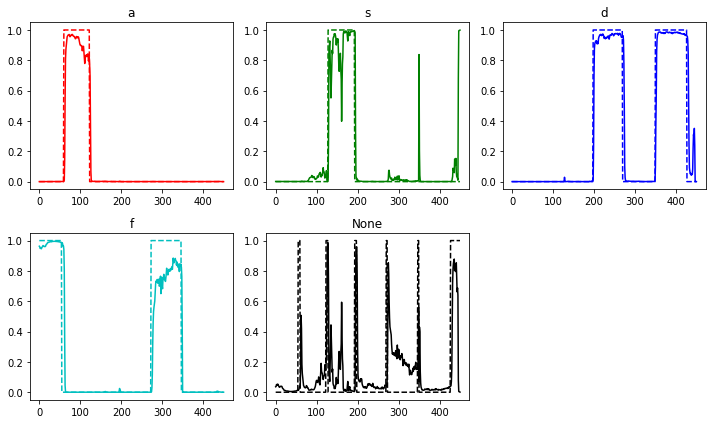

In [18]:
import matplotlib.pyplot as plt

size = len(y_test)

fig = plt.figure(figsize=(10,6))

keys = [('r', "a"), ('g', "s"), ('b', "d"), ('c', "f"), ('k', "None")]

for i, (color, key_class) in enumerate(keys):
    k = fig.add_subplot(2,3,i+1)
    k.set_title(key_class)
    k.plot(range(size), y_test[key_class], color+'--')
    k.plot(range(size), predict[:,i], color) 

plt.tight_layout()
plt.show()

In [19]:
def up_sensivity(data, sensivity=2):

    denominator = (sensivity * sum(data) - (sensivity - 1)* data[4])
    
    data[0], data[1], data[2], data[3], data[4] = (
    sensivity * data[0] / denominator,
    sensivity * data[1] / denominator,
    sensivity * data[2] / denominator,
    sensivity * data[3] / denominator,
    data[4] / denominator
    )

    return data
    

In [20]:
for row in range(len(predict)):
    predict[row] = up_sensivity(predict[row], 3)

In [21]:
for row in range(len(predict)):
    predict[row] = up_sensivity(predict[row], 3)

    
conf_predict = []
conf_y_test = []

for i in range(len(predict)):
    conf_predict.append(predict[i].argmax())
    conf_y_test.append(y_test_numpy[i].argmax())

tf.math.confusion_matrix(conf_y_test, conf_predict)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 60,   0,   0,   3,   0],
       [  0,  64,   0,   0,   1],
       [  0,   1, 147,   0,   1],
       [  0,   0,   3, 126,   0],
       [  3,  12,  14,   8,   8]], dtype=int32)>

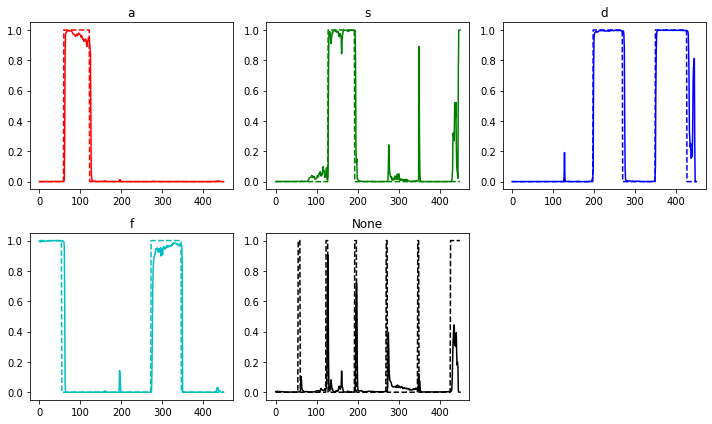

In [22]:
import matplotlib.pyplot as plt

size = len(y_test)

fig = plt.figure(figsize=(10,6))

keys = [('r', "a"), ('g', "s"), ('b', "d"), ('c', "f"), ('k', "None")]

for i, (color, key_class) in enumerate(keys):
    k = fig.add_subplot(2,3,i+1)
    k.set_title(key_class)
    k.plot(range(size), y_test[key_class], color+'--')
    k.plot(range(size), predict[:,i], color) 

plt.tight_layout()
plt.show()

In [23]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

2021-12-01 13:11:44.969354: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmp21a9j72q/assets


2021-12-01 13:11:46.004387: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2021-12-01 13:11:46.004458: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2021-12-01 13:11:46.006877: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmp21a9j72q
2021-12-01 13:11:46.010372: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2021-12-01 13:11:46.010431: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: /tmp/tmp21a9j72q
2021-12-01 13:11:46.020279: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2021-12-01 13:11:46.095903: I tensorflow/cc/saved_model/loader.cc:194] Running initialization op on SavedModel bundle at path: /tmp/tmp21a9j72q
2021-12-01 13:11:46.116650: I tensorflow/cc/saved_model/loader.cc:283] SavedModel load for tags { serve }; Status: success: OK. Took 109924